In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [4]:
df = pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [24]:
left = df[df.left==0]
left.shape

(11428, 10)

In [25]:
left = df[df.left==1]
left.shape

(3571, 10)

In [33]:
df.shape


(14999, 10)

In [41]:
numeric_df = df.select_dtypes(include=['number'])
numeric_df.groupby("left").mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


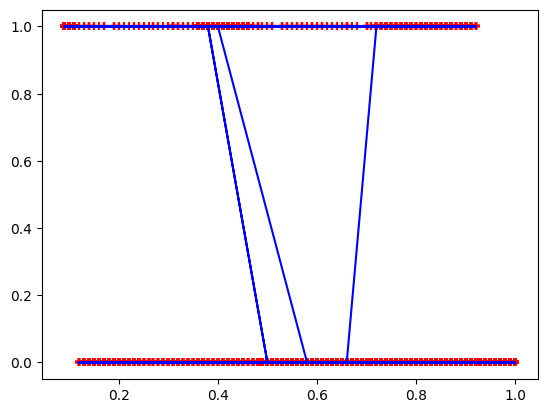

In [102]:
plt.scatter(numeric_df["satisfaction_level"],numeric_df["left"], marker="+", color="red")
plt.plot(numeric_df['satisfaction_level'], numeric_df['left'], color='blue', label='Regression Line')

<Axes: xlabel='salary'>

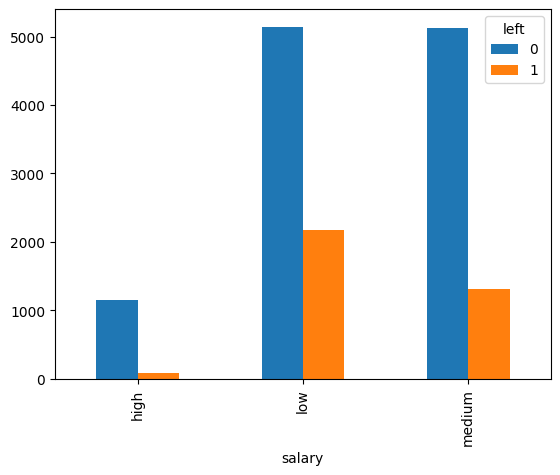

In [43]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

<Axes: xlabel='Department'>

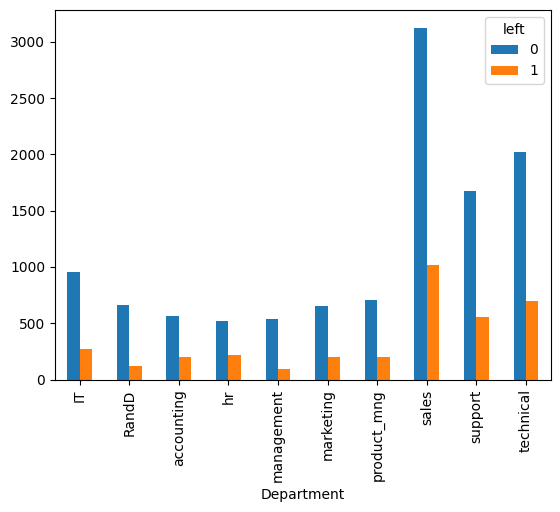

In [45]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

<Axes: xlabel='average_montly_hours'>

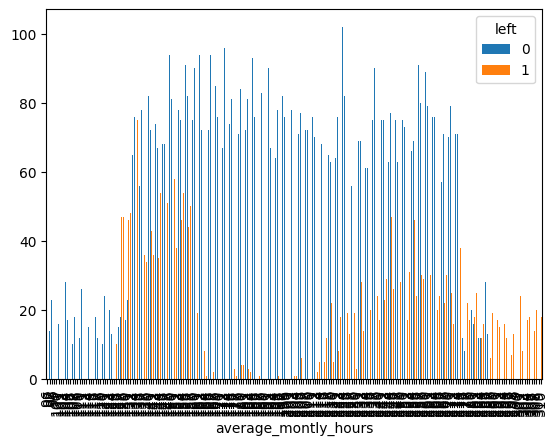

In [46]:
pd.crosstab(df.average_montly_hours,df.left).plot(kind='bar')

In [47]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [51]:
subdf.shape

(14999, 4)

In [65]:
salary_dummies =  pd.get_dummies(subdf.salary)

In [66]:
df_with_dummies =  pd.concat([subdf,salary_dummies],axis="columns")

In [67]:
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,high,low,medium
0,0.38,157,0,low,False,True,False
1,0.80,262,0,medium,False,False,True
2,0.11,272,0,medium,False,False,True
3,0.72,223,0,low,False,True,False
4,0.37,159,0,low,False,True,False


In [68]:
df_with_dummies.drop("salary",axis="columns", inplace = True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,157,0,False,True,False
1,0.80,262,0,False,False,True
2,0.11,272,0,False,False,True
3,0.72,223,0,False,True,False
4,0.37,159,0,False,True,False


In [69]:
X = df_with_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,157,0,False,True,False
1,0.80,262,0,False,False,True
2,0.11,272,0,False,False,True
3,0.72,223,0,False,True,False
4,0.37,159,0,False,True,False


In [85]:
X.shape

(14999, 6)

In [86]:
Y = df.left
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.3)

In [89]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [97]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0], shape=(10500,))

In [98]:
model.score(X_test,Y_test)

0.774